In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [3]:
# 导入 qutip
from qutip import *

In [4]:
# 找到 qutip 的路径
import qutip
path = qutip.__file__
path

'D:\\conda\\envs\\qutip_env\\lib\\site-packages\\qutip\\__init__.py'

`Qobj` 表示量子态或着算符，该类中包含了描述量子系统的信息：
* 矩阵表示
* 复结构
* 维度

## 创建和探索 `Qobj`

In [5]:
# 创建一个态矢量(列矢量)
q = Qobj([[1], [0], [0]])
q

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]]

## `Qobj` 对象有很多属性，这些属性代表了量子系统的信息

In [6]:
# 维度
q.dims

[[3], [1]]

In [7]:
# 矩阵的形状
q.shape

(3, 1)

In [8]:
# 矩阵本身的信息以及数据
q.data

<3x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [9]:
# 矩阵的全表示（包含所有的数据信息）
q.full()

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [10]:
# 量子对象的其他信息（是否厄米，什么类型的矩阵）
print(q.isherm)
print(q.type)

False
ket


## 利用 `Qobj` 参与计算

In [11]:
# 构造 pauli-y 算符
sigmaY = Qobj([[0, -1j], [1j, 0]])
sigmaY

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [12]:
# 构造 Pauli-z 算符
sigmaZ = Qobj([
    [1, 0],
    [0, -1]
])
sigmaZ

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [13]:
# 利用上述 Pauli 算符构造哈密顿量
H = 1 * sigmaZ + 0.1 * sigmaY  
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

In [14]:
H.full()

array([[ 1.+0.j ,  0.-0.1j],
       [ 0.+0.1j, -1.+0.j ]])

In [15]:
# 求厄米共轭
sigmaY.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [16]:
# 求 trace
H.tr()

0.0

In [17]:
# 求能量本征值
H.eigenenergies()

array([-1.00498756,  1.00498756])

## 内置态矢量和算符

### 态矢量

In [18]:
# Fock state

# 希尔伯特空间的维度（能级的个数）
N = 2

# 占据态（从0开始算）
n = 1

# 生成 Fock 态
basis(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [19]:
# 另一种表示
fock(5, 3)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]

In [20]:
# 相干态

# Fock 态空间的维度
N = 10

# 相干态的大小
alpha = 1.0

# 相干态（在 Fock 态表象下表示）
coherent(N, alpha)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

### 密度矩阵

In [21]:
# 生成 Fock 态的密度矩阵
fock_dm(5, 2)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [22]:
# 生成相干态密度矩阵（Fock 态表象下）
coherent_dm(8, 1.0)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[3.67879439e-01 3.67879455e-01 2.60129900e-01 1.50187300e-01
  7.50858773e-02 3.36199110e-02 1.35485515e-02 5.77267786e-03]
 [3.67879455e-01 3.67879470e-01 2.60129911e-01 1.50187306e-01
  7.50858804e-02 3.36199124e-02 1.35485520e-02 5.77267810e-03]
 [2.60129900e-01 2.60129911e-01 1.83939513e-01 1.06198399e-01
  5.30937031e-02 2.37728537e-02 9.58026722e-03 4.08189737e-03]
 [1.50187300e-01 1.50187306e-01 1.06198399e-01 6.13141770e-02
  3.06539153e-02 1.37253761e-02 5.53121524e-03 2.35670388e-03]
 [7.50858773e-02 7.50858804e-02 5.30937031e-02 3.06539153e-02
  1.53253712e-02 6.86197771e-03 2.76532136e-03 1.17822997e-03]
 [3.36199110e-02 3.36199124e-02 2.37728537e-02 1.37253761e-02
  6.86197771e-03 3.07246966e-03 1.23818035e-03 5.27555757e-04]
 [1.35485515e-02 1.35485520e-02 9.58026722e-03 5.53121524e-03
  2.76532136e-03 1.23818035e-03 4.98976640e-04 2.12600691e-04]
 [5.77267786e-03 5.77267810e-03 4.0

In [23]:
# 热态

# 热态的平均光子数
n = 1

# 热态是混态，只有密度矩阵表示
thermal_dm(8, n)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.50196078 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25098039 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.1254902  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0627451  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03137255 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01568627
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157]]

### 算符

#### Qubit（二能级系统）的算符

In [24]:
# 内置泡利算符
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [25]:
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [26]:
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

#### 线性谐振子算符（不是二能级，可以指定任意维度的能级空间）

In [27]:
# 湮灭算符
destroy(N = 8)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [28]:
# 创生算符
create(8)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

In [29]:
# 位置算符
a = destroy(8)
x = a + a.dag()

x

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

#### 求对易子

In [30]:
# 定义对易子计算方法
def commutator(op1, op2):
    commut = op1 * op2 - op2 * op1
    return commut

#### 求湮灭算符 $\hat a$ 与创生算符 $\hat a^\dagger$ 的对易子

In [31]:
a = destroy(5)
a_dag = a.dag()
commutator(a, a_dag)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]

可以看出来，这个矩阵并不是单位矩阵，矩阵右下角出现的 -4.0 是因为 Fock 空间本身应该是无限维的，在这里我们进行了截断处理。

### 尝试在不同能级截断结果有何不同

In [32]:
a = destroy(6)
a_dag = a.dag()
commutator(a, a_dag)

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0. -5.]]

可以看到一些规律，右下角的数字为 （$1-\text{截断的空间维度}$）

$[x, p] = i$

In [33]:
x = (a + a_dag) / np.sqrt(2)
p = -1j * (a - a_dag) / np.sqrt(2)

commutator(x, p)

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-5.j]]

$[\sigma_x, \sigma_y] = 2\mathrm{i}\sigma_z$

In [34]:
commutator(sigmax(), sigmay())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

In [35]:
sigmaz() * 2j

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

$-\mathrm{i}\sigma_x \sigma_y \sigma_z = 1$

In [36]:
-1j * sigmax() * sigmay() * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

## 复合系统

### 直积

对 qubit 1 进行 $\sigma_z$ 操作，对 qubit 2 不进行操作

In [37]:
sz1 = tensor(sigmaz(), qeye(2))
# qeye 为单位矩阵。
# 注意 qutip 的 Qobj 对象不能和 numpy 或者 pandas 的矩阵混用，
# 要做矩阵直积，所有的对象都需要是 Qobj 对象。
sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

态空间直积

In [38]:
N = 2
psi1 = tensor(basis(N, 0), basis(N, 1))
psi2 = tensor(basis(N, 1), basis(N, 0))
print(psi1, '\n', psi2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]] 
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


In [39]:
# 将算符作用在两比特态上
sz1 * psi1 == psi1

True

In [40]:
print(sz1 * psi2 == -psi2)
print(sz1 * psi2)

True
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [-1.]
 [ 0.]]


两个 `Qobj` 对象可以使用普通乘法，且乘积仍然是 `Qobj` 对象，说明这 `Qobj` 类对运算符进行了方法重构，在这里算是替代了 numpy

### 两比特耦合哈密顿量
$H = \epsilon_1 \sigma_z^1 +\epsilon_2 \sigma_z^2 + g\sigma_x^1\sigma_x^2 $

In [41]:
epsilon = [1.0, 2.0]
g = 0.3

H = epsilon[0] * tensor(sigmaz(), qeye(2)) + epsilon[1] * tensor(qeye(2), sigmaz()) + g * tensor(sigmax(), sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 3.   0.   0.   0.3]
 [ 0.  -1.   0.3  0. ]
 [ 0.   0.3  1.   0. ]
 [ 0.3  0.   0.  -3. ]]

In [42]:
H.eigenstates()

(array([-3.01496269, -1.04403065,  1.04403065,  3.01496269]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.0498137 ]
         [ 0.        ]
         [ 0.        ]
         [-0.99875853]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.        ]
         [-0.9894004 ]
         [ 0.14521314]
         [ 0.        ]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[0.        ]
         [0.14521314]
         [0.9894004 ]
         [0.        ]]                                                     ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[0.99875853]
         [0.        ]
         [0.        ]
         [0.0498137 ]]                               

### JC-model
$H = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g(a\sigma_+  + a^\dagger \sigma_-)$

In [43]:
omega_c = 1.0   # 腔频
omega_a = 1.0   # qubit 频率
g = 0.1 # 耦合强度

In [68]:
# 腔模式下的算符（假设腔模式在第五个处截断）
a = tensor(destroy(5), qeye(2))
a_dag = a.dag()

# qubit 的算符
sz = tensor(qeye(5), sigmaz())
sm = tensor(qeye(5), destroy(2))
sp = sm.dag()

# 总哈密顿量
H = omega_c * a_dag * a - 0.5 * omega_a * sz + g * (a * sp + a_dag * sm)
H

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.   

需要注意的是
$a \sigma_+ = (a \otimes I)(I \otimes \sigma_+)$

In [69]:
H.eigenenergies()

array([-0.5       ,  0.4       ,  0.6       ,  1.35857864,  1.64142136,
        2.32679492,  2.67320508,  3.3       ,  3.7       ,  4.5       ])

## 动力学演化（幺正演化）
`mesolve` 求解 master equation （主方程）。
无耗散时会退化到薛定谔方程（态演化）或者冯诺依曼方程（算符演化）

### Return
求解的返回值为一个 `Odedata` 对象，指的是 ordinary differential equation（常微分方程）求解数据

#### 以 $H = \sigma_x$，初态为 $| 1\rangle$ 为例

In [71]:
# 哈密顿量为
H = sigmax()

# 初态
psi0 = basis(2, 1)

# 离散时间列表（求解每一个时刻的状态）
tls = np.linspace(0, 10, 100)

res = mesolve(H, psi0, tls, [], [])

In [72]:
res

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

res 里面包含了每个时刻的求解结果

In [75]:
# 初态
print(res.states[0])

# 末态
print(res.states[-1])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.       +0.54401206j]
 [-0.8390774+0.j        ]]


### 期望值
可以求算符在单个态下期望，也可以求一组期望

In [76]:
# 求哈密顿量在末态的期望
expect(H, res.states[-1])

0.0

In [77]:
# 求 pauli-Z 算符在末态的期望
expect(sigmaz(), res.states[-1])

-0.40810176186455965

In [81]:
# 求 pauli-Z 算符在演化的每一时刻的期望
evalue = expect(sigmaz(), res.states)

### 画出 $\sigma_z$ 期望值的演化图

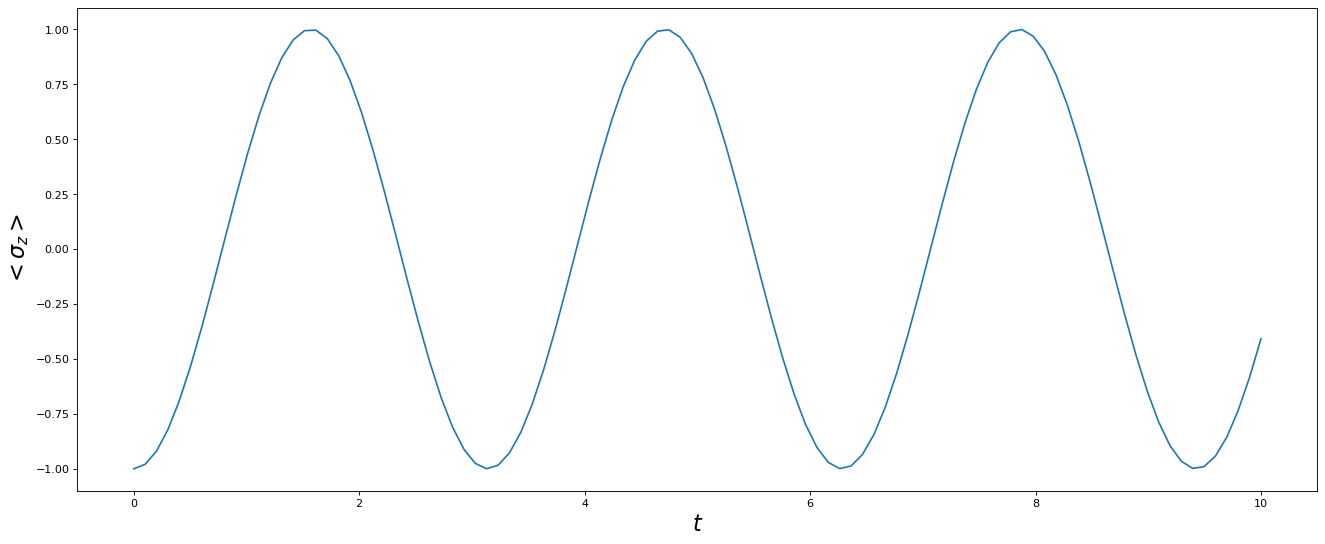

In [88]:
plt.figure(figsize=(20,8), dpi=80)
plt.plot(tls, evalue)

plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$<\sigma_z >$', fontsize=20)
plt.show()

### 直接在 `mesolve` 里计算时就一并求解期望值

In [89]:
res = mesolve(H, psi0, tls, [], [sigmax(), sigmay(), sigmaz()])

现在，这些求解的期望值在 `res` 本身的属性里就有

In [91]:
res.expect[1]

array([ 0.        ,  0.2006488 ,  0.39313648,  0.56963387,  0.72296223,
        0.84688518,  0.93636238,  0.98775449,  0.99897125,  0.96955644,
        0.90070646,  0.79522165,  0.65739242,  0.49282475,  0.30821213,
        0.11106341, -0.0906027 , -0.28858368, -0.4748269 , -0.64175721,
       -0.782585  , -0.89158231, -0.9643159 , -0.99782745, -0.99075396,
       -0.94338312, -0.85764166, -0.73701694, -0.58641519, -0.41196187,
       -0.22075258, -0.02056446,  0.18046012,  0.37414472,  0.55261151,
        0.70860162,  0.83577041,  0.92894553,  0.98433722,  0.99969255,
        0.97438698,  0.90944976,  0.80752209,  0.67274971,  0.51061425,
        0.32771028,  0.13147716, -0.07010365, -0.26883311, -0.45662814,
       -0.62585046, -0.76961723, -0.88208098, -0.95866746, -0.99626163,
       -0.99333444, -0.95000495, -0.86803551, -0.75076006, -0.60294861,
       -0.4306131 , -0.24076303, -0.04112023,  0.16019512,  0.35499473,
        0.53535543,  0.69394131,  0.82430216,  0.92113578,  0.98

### 画图

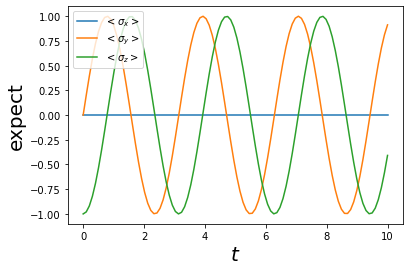

In [98]:
fig, axes = plt.subplots(1, 1)

for i in range(3):
    axes.plot(tls, res.expect[i], label=f'$<\sigma_{chr(120+i)}>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel("expect", fontsize=20)
axes.legend(loc=2, fontsize=10)

### 有耗散的动力学
耗散算符: $\sqrt{\kappa}a$

In [102]:
omega = 1.0
kappa = 0.1 # 耗散率

a = destroy(10)
rho = fock_dm(10, 5)

H = omega * a.dag() * a
H


Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]

In [103]:
# 耗散算符
collapse = np.sqrt(kappa) * a

In [104]:
tlist = np.linspace(0, 50, 100)

res = mesolve(H, rho, tlist, [collapse], [a.dag() * a])

注意这里输入的 `c_ops` 以及 `e_ops` 都必须是一列算符，如果只有一个算符，也需要给外面加上列表，输入一个只有单元素的列表

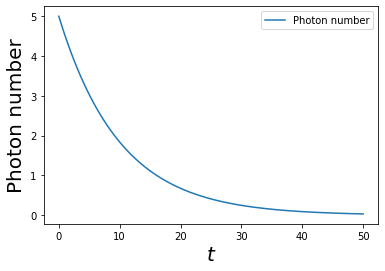

In [111]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, res.expect[0], label='Photon number')
axes.set_xlabel('$t$', fontsize=20)
axes.set_ylabel(r'Photon number', fontsize=20)
axes.legend(loc=1)

## Software versions

In [113]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.20.3
SciPy,1.7.1
matplotlib,3.4.2
Cython,0.29.24
Number of CPUs,8
BLAS Info,INTEL MKL
IPython,7.27.0
Python,"3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
